# Regression for Predicting of House Preices

## Defining the Question

### a) Problem Statement

This work will focus on:
  1. Identifying the factors that affect house prices
  2. Predicting house prices given a set of predictor variables

### b) Success Metrics
* Accuracy score of above 80%
* Least possible RMSE value
* Identifying the best Model


### c) Understanding the context 

Hass Consulting Company is a real estate leader with over 25 years of experience. The company wishes to understand the factors that affect the price of a house and to further build a model to predict the price of a house given a set of the predictor variables.

### d) Recording the Experimental Design

* Read and explore the given dataset.
* Define the appropriateness of the available data to answer the given question.
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform univariate, bivariate and multivariate analysis recording your observations.
* Performing regression analysis. This will be done using the following regression techniques:
      1. Linear Regression
      2. Quantile Regression
      3. Ridge Regression
      4. Lasso Regression
      5. Elastic Net Regression
* Incorporate categorical independent variables into your models.
* Check for multicollinearity
* Provide a recommendation based on your analysis. 
* Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
* Challenge your solution by providing insights on how you can make improvements in model improvement.

### e) Data Relevance

The data contains much of the factors that are considered when purchasing a house. Worth noting is that each of these features comes at a cost. For example extra room implies extra cost and so on.

## Reading the Data and Loading Dependencies

In [ ]:
# DEPENDENCIES

# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# ML Processes

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Loading data
data = pd.read_csv('/content/house_data.csv')

## Checking the Data

In [ ]:
# No of records in our dataset
data.shape

(21613, 20)

In [ ]:
# Previewing the data
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Checking whether each column has an appropriate datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

* The 'id' variable is not useful for our analysis
* 'price' is the **independent variable** and we shall explore its relation with to the other variables
* There is no missing value in this data

In [ ]:
# Further statistical description of the data
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Tidying the Dataset

In [ ]:
# Checking for duplicate values
print('Data 1: ', data.duplicated().any())

Data 1:  True


* The data has duplicate values

In [ ]:
# Removing the duplicates from data
data.drop_duplicates(keep='first', inplace = True)

In [ ]:
# Checking the new shape of the data
data.shape

(21610, 20)

In [ ]:
# Dropping Unnecessay columns from dataset
data = data.drop(['id'], axis=1)

* Other columns will be dropped as needed from analysis

## Univariate, Bivariate  & Multivariate Analysis

Numerical data distribution

In [ ]:
# Exploring the 'price' column
data['price'].describe()

count    2.161000e+04
mean     5.401789e+05
std      3.673876e+05
min      7.500000e+04
25%      3.216125e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Text(0.5, 1.0, 'Distributions of the various variables')

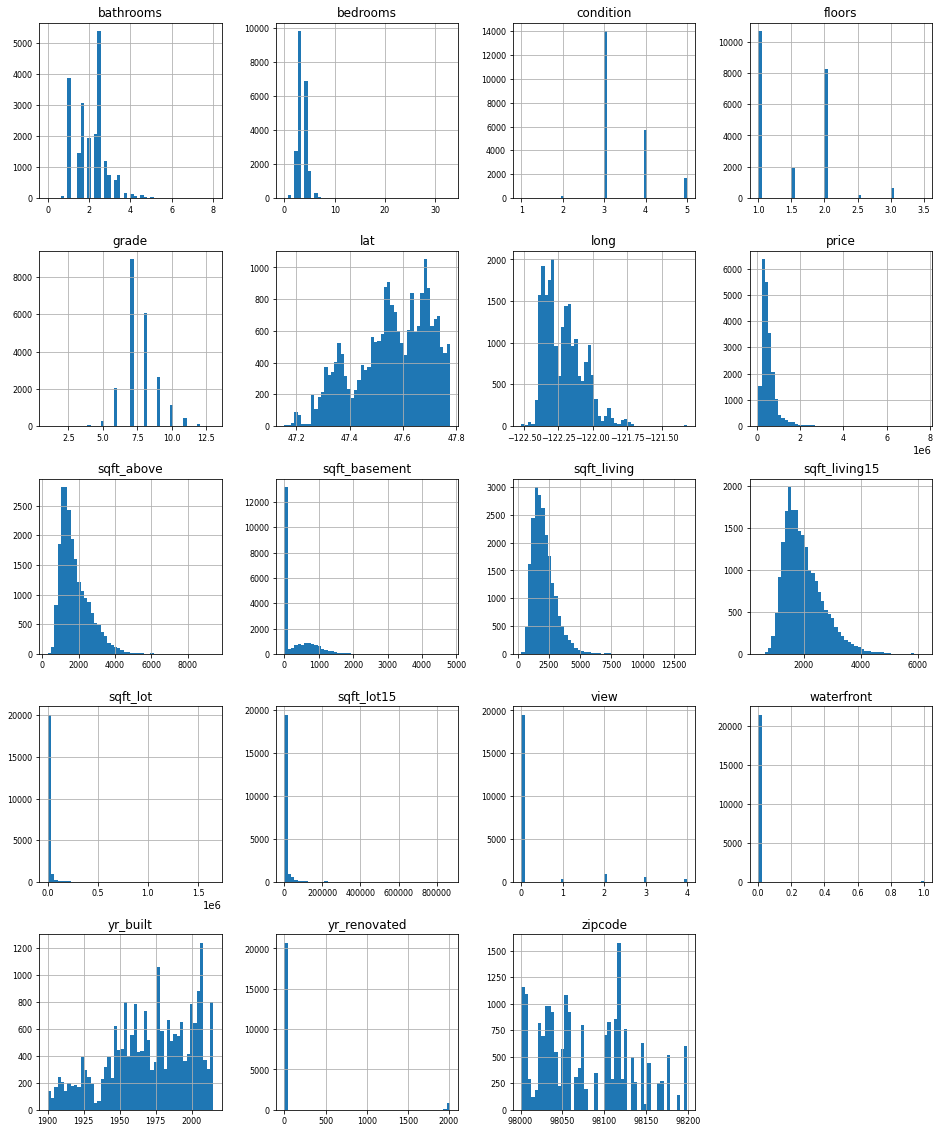

In [ ]:
# Visualization of the distribution of the variables
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.title('Distributions of the various variables')


Correlation

In [ ]:
data_corr = data.corr()['price'][1:].sort_values(ascending=False) # 
data_corr

sqft_living      0.702046
grade            0.667478
sqft_above       0.605569
sqft_living15    0.585382
bathrooms        0.525140
view             0.397466
sqft_basement    0.323849
bedrooms         0.308346
lat              0.306922
waterfront       0.266332
floors           0.256793
yr_renovated     0.126503
sqft_lot         0.089658
sqft_lot15       0.082457
yr_built         0.053980
condition        0.036397
long             0.021567
zipcode         -0.053162
Name: price, dtype: float64

* There is a **strong correlation** between price and sqft_living, grade, sqft_above, sqft_living15, and bathrooms 


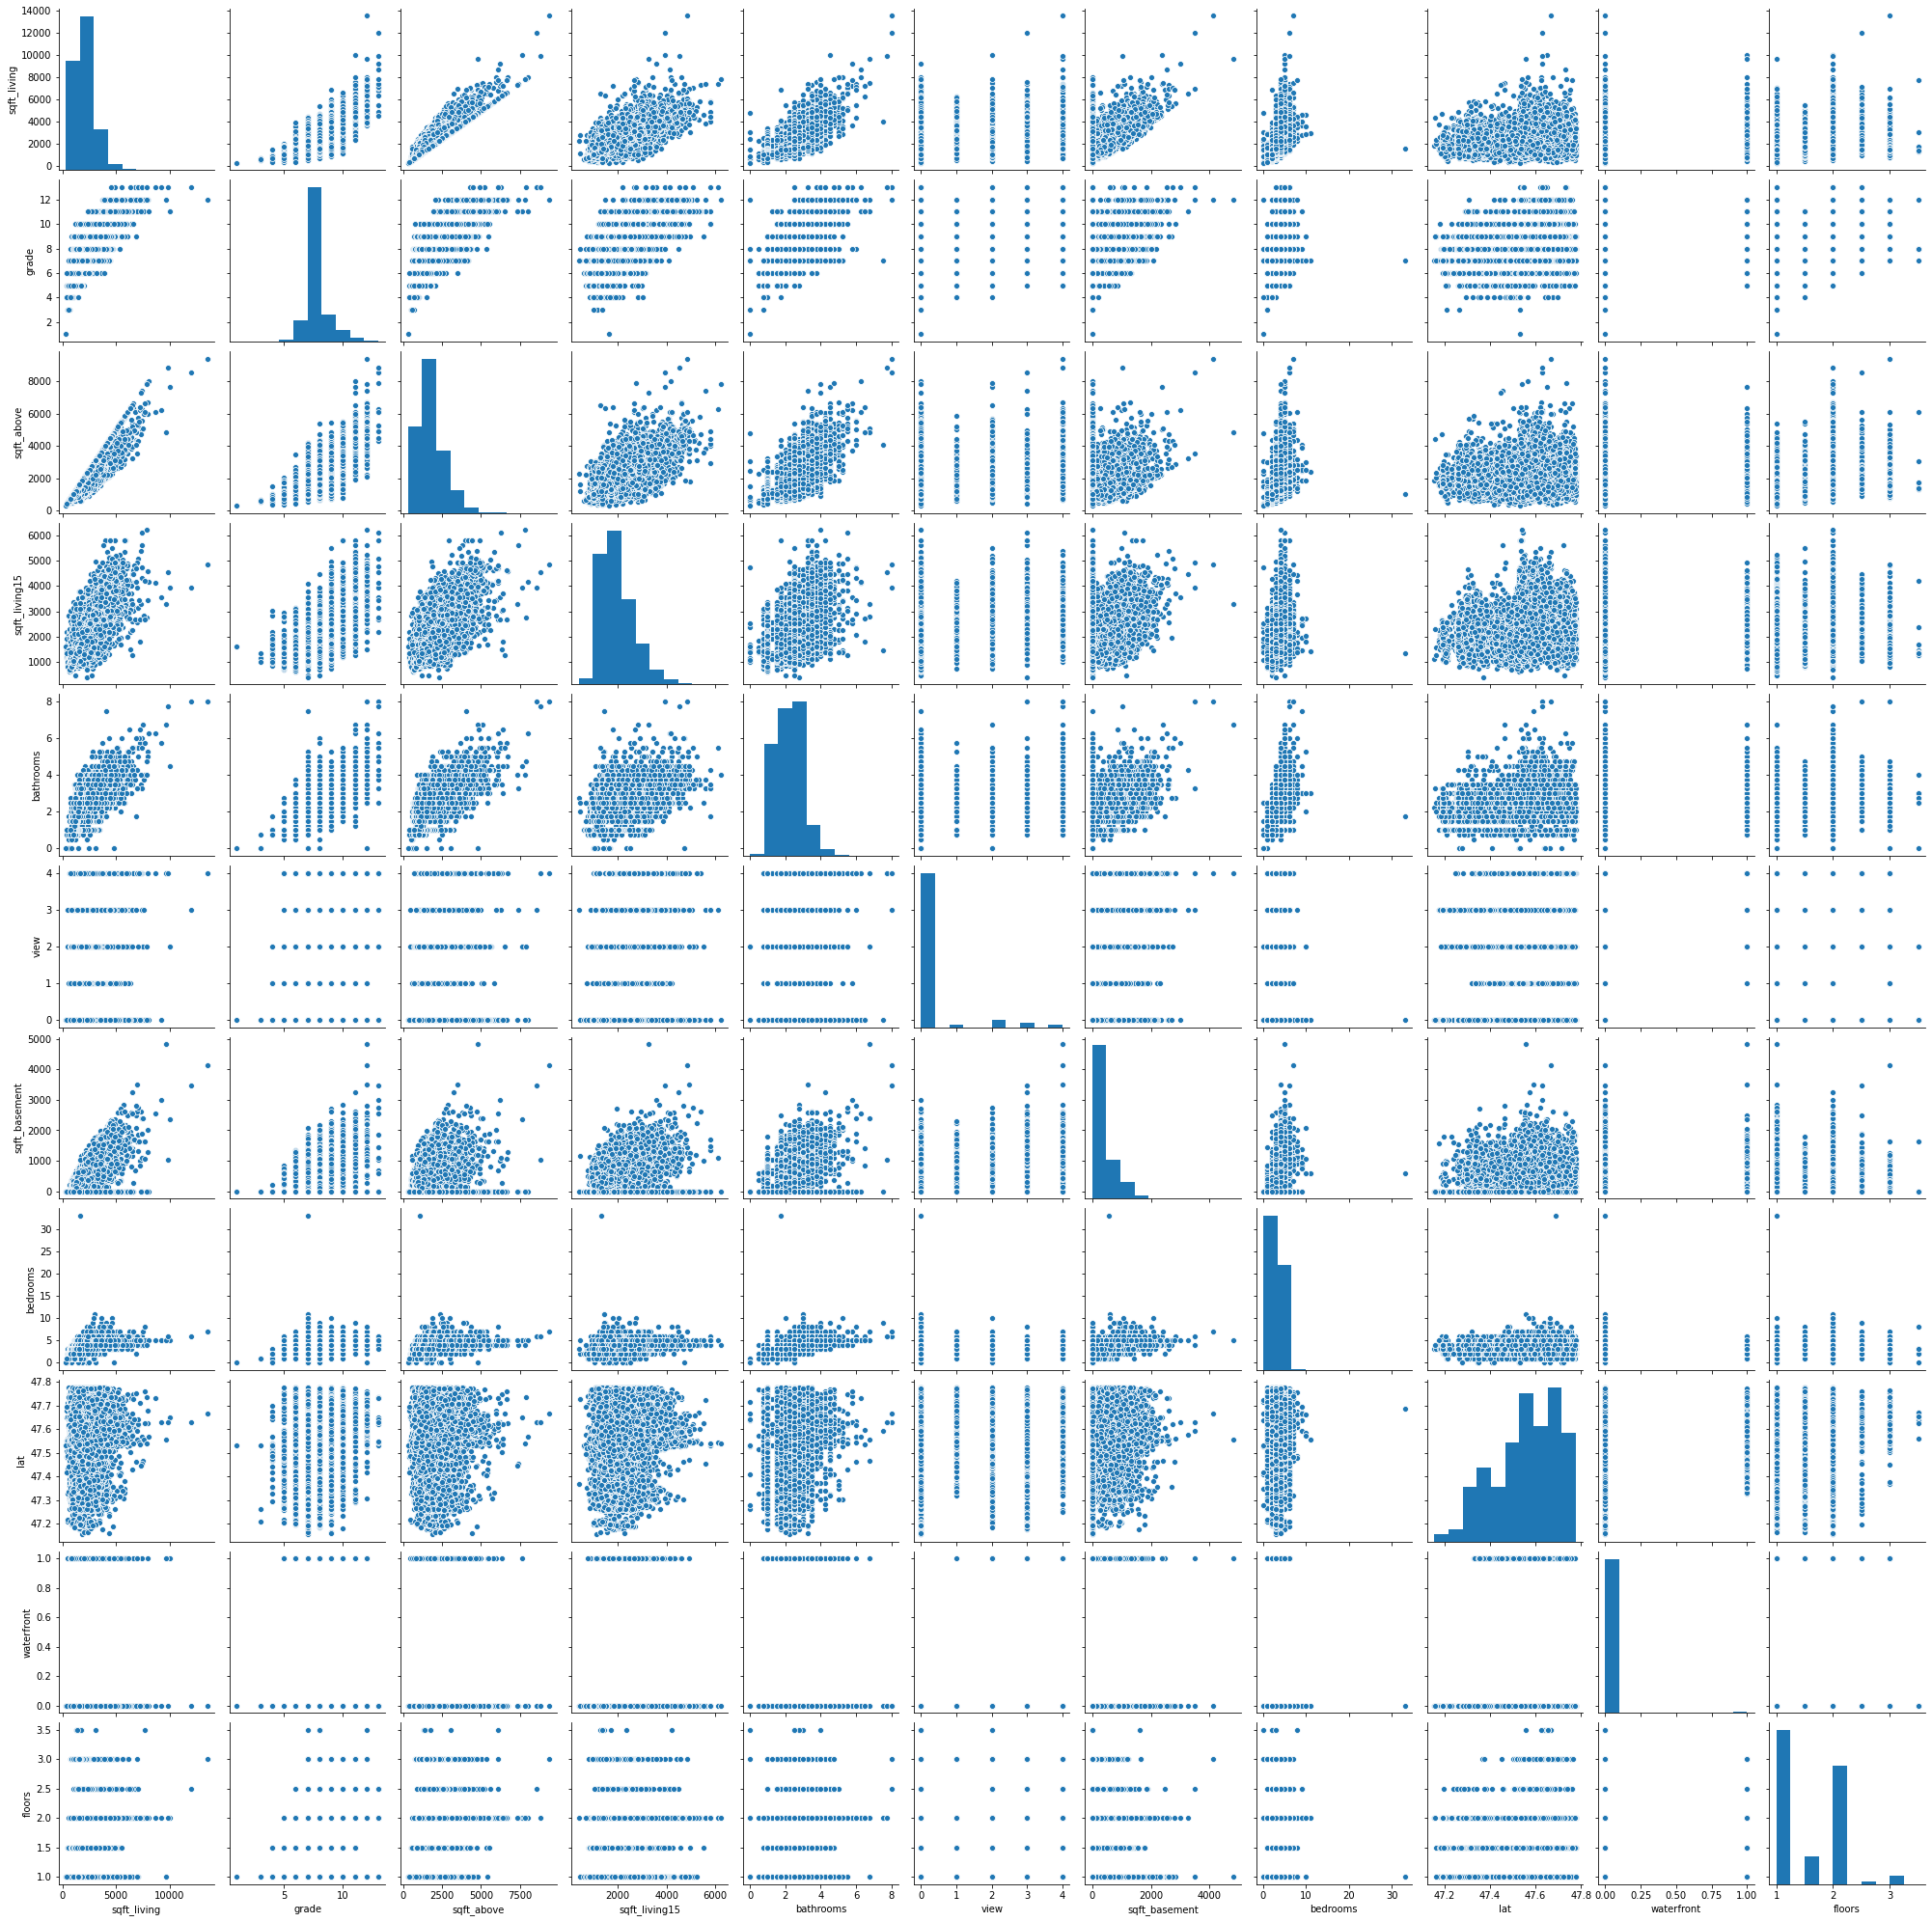

In [ ]:
# Pairplot of features with a correlation coefficient of at least 0.25
features = ['sqft_living','grade','sqft_above','sqft_living15','bathrooms',
            'view','sqft_basement','bedrooms','lat','waterfront','floors']
sns.pairplot(data[features])

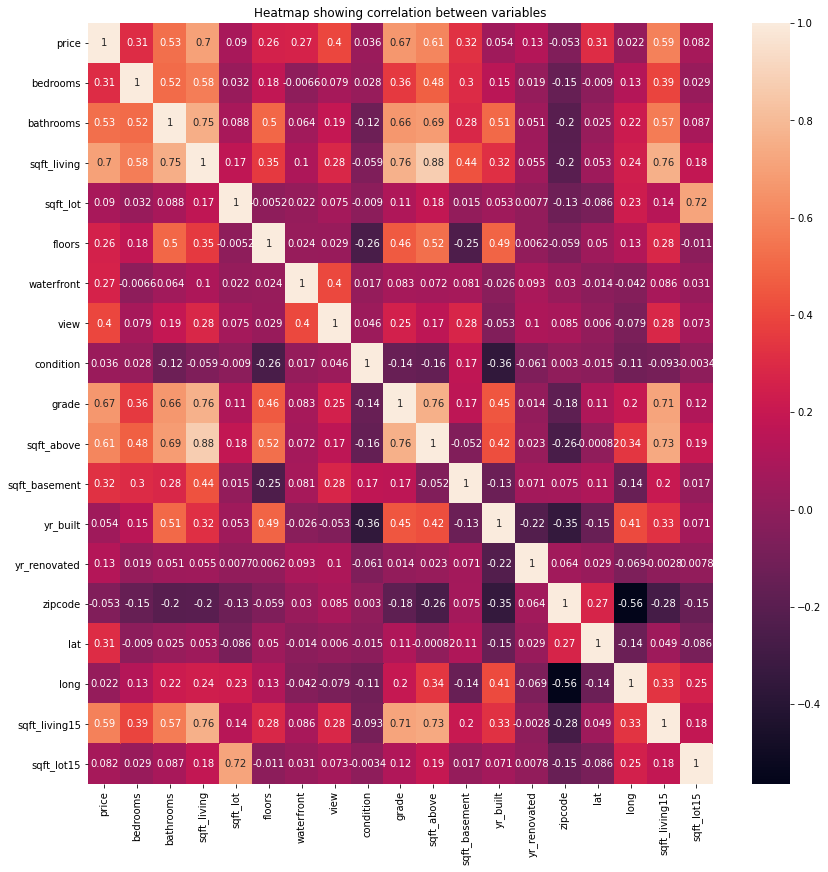

In [ ]:
# Computing correlation coeffiecient between features
plt.figure(figsize = (14, 14))
sns.heatmap(data.corr(), annot = True) 
plt.title('Heatmap showing correlation between variables')
plt.show()

## Multicollinearity check

In [ ]:
# Correlations in the data set
correlations = data.corr()
correlations

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308346,0.525140,0.702046,0.089658,0.256793,0.266332,0.397466,0.036397,0.667478,0.605569,0.323849,0.053980,0.126503,-0.053162,0.306922,0.021567,0.585382,0.082457
bedrooms,0.308346,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,0.154276,0.018695,-0.152721,-0.008953,0.129474,0.391633,0.029233
bathrooms,0.525140,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,0.505997,0.050879,-0.203831,0.024590,0.223047,0.568665,0.087191
sqft_living,0.702046,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,0.318099,0.055314,-0.199435,0.052521,0.240221,0.756420,0.183285
sqft_lot,0.089658,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,0.053105,0.007677,-0.129611,-0.085680,0.229552,0.144620,0.718556
floors,0.256793,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,0.489347,0.006156,-0.059025,0.049593,0.125343,0.279861,-0.011250
waterfront,0.266332,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,-0.026159,0.092950,0.030277,-0.014272,-0.041904,0.086469,0.030702
view,0.397466,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,-0.053229,0.103208,0.084838,0.006049,-0.078560,0.280404,0.072577
condition,0.036397,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,-0.361347,-0.060862,0.002962,-0.014971,-0.106512,-0.092854,-0.003424
grade,0.667478,0.357003,0.664990,0.762719,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,0.446966,0.014372,-0.184795,0.114086,0.198347,0.713208,0.119265


In [ ]:
# Using the VIF method to determine multicollinearity
vif_coeff = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

# Taking the abovee computed values and computing their absolute values
vif_coeff = abs(vif_coeff.values)

# Writing them back into a DataFrame
vif_coeff = pd.DataFrame(vif_coeff, columns = correlations.columns)

vif_coeff

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3.331173,0.301655,0.286931,7.756703e-01,0.048127,0.033169,0.457060,0.368445,0.156087,1.023070,6.603992e-01,2.283154e-01,0.698362,0.072940,0.282685,0.757544,0.274226,0.134816,0.094664
1,0.301655,1.679476,0.487409,6.849758e-01,0.044969,0.046845,0.021689,0.081065,0.064768,0.214297,3.816443e-01,2.099447e-01,0.197749,0.039194,0.105772,0.017761,0.042386,0.013076,0.093988
2,0.286931,0.487409,3.375963,3.071047e+00,0.019888,0.672552,0.049466,0.010651,0.123821,0.179805,1.615551e+00,4.539048e-01,0.995898,0.254153,0.017440,0.024171,0.030121,0.103633,0.063290
3,0.780130,0.685720,3.073392,1.808269e+13,0.071864,2.724742,0.031686,0.076590,0.137866,1.700271,1.630373e+13,8.713486e+12,0.300122,0.173058,0.418340,0.121953,0.160089,1.039574,0.073786
4,0.048127,0.044969,0.019888,7.227470e-02,2.103222,0.045660,0.033972,0.053786,0.032777,0.039084,1.145177e-01,8.868223e-04,0.088645,0.022348,0.006664,0.064283,0.137168,0.165881,1.460676
5,0.033169,0.046845,0.672552,2.724423e+00,0.045660,2.012304,0.000973,0.036398,0.091386,0.220640,2.947114e+00,6.919033e-01,0.488278,0.079259,0.173630,0.119978,0.161550,0.273975,0.071714
6,0.457060,0.021689,0.049466,3.203527e-02,0.033972,0.000973,1.266681,0.442302,0.008596,0.189644,4.590644e-02,6.358753e-02,0.116922,0.055843,0.016224,0.113755,0.010384,0.072894,0.031469
7,0.368445,0.081065,0.010651,7.577904e-02,0.053786,0.036398,0.442302,1.476072,0.003862,0.072114,1.216171e-01,2.262138e-01,0.074443,0.031051,0.171905,0.202421,0.041603,0.310477,0.017939
8,0.156087,0.064768,0.123821,1.380302e-01,0.032777,0.091386,0.008596,0.003862,1.256814,0.006570,2.439167e-01,2.694233e-03,0.528787,0.210331,0.148034,0.099223,0.019725,0.082225,0.032678
9,1.023070,0.214297,0.179805,1.698571e+00,0.039084,0.220640,0.189644,0.072114,0.006570,3.731186,3.396397e-01,5.171024e-01,0.853388,0.049071,0.003663,0.098203,0.309495,0.870195,0.042790



* VIF starts at 1 and has no upper limit
* VIF = 1, no correlation between the independent variable and the other variables
* VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

So in this case the colinearity is not all that significant


## Residual plots and heteroskedasticity testing

## Preprocessing

In [ ]:
# Let's separate into train and test set
X_train, X_test, y_train, y_test = train_test_split(data, data.price, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((15127, 19), (6483, 19))

In [ ]:
# fit scaler
scaler = StandardScaler() # create an instance
scaler.fit(X_train) #  fit  the scaler to the train set for later use

StandardScaler(copy=True, with_mean=True, with_std=True)

## Building the Models

### Linear Regression

### Quantile Regression

### Ridge Regression

### Lasso Regression

### Elastic Net Regression

## Challenging the solution

* The accuracy of 68.98% is below our desired threshhold
* The model could further be improved through hypeparameter tuning




